### Data Mining and Machine Learning Project
Abhishek Minz

MSC Data Analytics

x21173184@student.ncirl.ie

In [1]:
library(caret) #For downsampling
library(caTools) #To split our data
library("readxl") #To read xls file
library(fastDummies) #For dummies
library(tidyverse)
library(gmodels)

Loading required package: ggplot2

Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()


In [2]:
data<- read_excel('Credit Card Defaulters.xls', skip=1) #Skipping the first row since variable names are in second row

In [3]:
str(data)

tibble [30,000 × 25] (S3: tbl_df/tbl/data.frame)
 $ ID                        : num [1:30000] 1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL                 : num [1:30000] 20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : num [1:30000] 2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : num [1:30000] 2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE                  : num [1:30000] 1 2 2 1 1 2 2 2 1 2 ...
 $ AGE                       : num [1:30000] 24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : num [1:30000] 2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : num [1:30000] 2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : num [1:30000] -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : num [1:30000] -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : num [1:30000] -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : num [1:30000] -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : num [1:30000] 3913 26

In [4]:
head(data)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [5]:
data['DEFAULT']<-data[,25]
data<-data[,-25]

In [6]:
#Removing ID column
data<-data[,-1]

In [7]:
data[data== ""] <- NA 

In [8]:
sapply(data,function(x) sum(is.na(x)))
#No missing value

LIMIT_BAL       SEX EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2     PAY_3 
        0         0         0         0         0         0         0         0 
    PAY_4     PAY_5     PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 
        0         0         0         0         0         0         0         0 
BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6   DEFAULT 
        0         0         0         0         0         0         0         0

In [9]:
unique(data$SEX)

[1] 2 1

In [10]:
unique(data$MARRIAGE)
#We will treat zero as a missing value

[1] 1 2 3 0

In [11]:
unique(data$EDUCATION)
#We will treat 0,5 and 6 as a missing value

[1] 2 1 3 5 4 6 0

In [12]:
data<-data[!(data$EDUCATION==0 | data$EDUCATION==5| data$EDUCATION==6),]
data<-data[!(data$MARRIAGE==0),]

In [13]:
#Converting categorical variables to factor since svm works in real valued space
data$SEX<-as.factor(data$SEX)
data$EDUCATION<-as.factor(data$EDUCATION)
data$MARRIAGE<-as.factor(data$MARRIAGE)
data$PAY_0<-as.factor(data$PAY_0)
data$PAY_2<-as.factor(data$PAY_2)
data$PAY_3<-as.factor(data$PAY_3)
data$PAY_4<-as.factor(data$PAY_4)
data$PAY_5<-as.factor(data$PAY_5)
data$PAY_6<-as.factor(data$PAY_6)
data$DEFAULT<-as.factor(data$DEFAULT)

In [14]:
table(data$DEFAULT)


    0     1 
22996  6605 

Data Integration

In [15]:
#Dataframe with only defaulters
data_default<-subset(data, DEFAULT == '1')

In [16]:
#Dataframe with only non-defaulters
data_no_default<-subset(data, DEFAULT == '0')

In [17]:
head(data_default)
length(data_default$DEFAULT)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
20000,2,2,1,24,2,2,-1,-1,-2,⋯,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
70000,1,2,2,30,1,2,2,0,0,⋯,66782,36137,36894,3200,0,3000,3000,1500,0,1
20000,1,1,2,24,0,0,2,2,2,⋯,18338,17905,19104,3200,0,1500,0,1650,0,1
120000,2,2,1,39,-1,-1,-1,-1,-1,⋯,0,632,316,316,316,0,632,316,0,1
70000,2,2,2,26,2,0,0,2,2,⋯,44006,46905,46012,2007,3582,0,3601,0,1820,1


[1] 6605

In [18]:
head(data_no_default)
length(data_no_default$DEFAULT)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9e+04,2,2,2,34,0,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5e+04,2,2,1,37,0,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5e+04,1,2,1,57,-1,0,-1,0,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
5e+04,1,1,2,37,0,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0
5e+05,1,1,2,29,0,0,0,0,0,⋯,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
1e+05,2,2,2,23,0,-1,-1,0,0,⋯,221,-159,567,380,601,0,581,1687,1542,0


[1] 22996

In [19]:
set.seed(1)
data_default_downsampled<- data_default %>% slice_sample(n = 5000) #Randomly selcting 5000 rows
data_no_default_downsampled<- data_no_default %>% slice_sample(n = 5000)

In [20]:
head(data_default)
head(data_no_default)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
20000,2,2,1,24,2,2,-1,-1,-2,⋯,0,0,0,0,689,0,0,0,0,1
120000,2,2,2,26,-1,2,0,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
70000,1,2,2,30,1,2,2,0,0,⋯,66782,36137,36894,3200,0,3000,3000,1500,0,1
20000,1,1,2,24,0,0,2,2,2,⋯,18338,17905,19104,3200,0,1500,0,1650,0,1
120000,2,2,1,39,-1,-1,-1,-1,-1,⋯,0,632,316,316,316,0,632,316,0,1
70000,2,2,2,26,2,0,0,2,2,⋯,44006,46905,46012,2007,3582,0,3601,0,1820,1


LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9e+04,2,2,2,34,0,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5e+04,2,2,1,37,0,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5e+04,1,2,1,57,-1,0,-1,0,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
5e+04,1,1,2,37,0,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0
5e+05,1,1,2,29,0,0,0,0,0,⋯,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
1e+05,2,2,2,23,0,-1,-1,0,0,⋯,221,-159,567,380,601,0,581,1687,1542,0


In [21]:
data_downsampled<-rbind(data_default_downsampled,data_no_default_downsampled)

In [22]:
length(data_downsampled$DEFAULT)

[1] 10000

In [23]:
head(data_downsampled)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
60000,1,1,2,30,-1,-1,-1,-1,-1,⋯,264,264,264,264,264,264,264,264,0,1
120000,1,2,1,41,-2,-2,-2,-2,-2,⋯,0,0,0,0,0,0,0,0,0,1
30000,2,3,1,35,2,2,2,2,2,⋯,27936,29930,29302,0,3000,0,2600,0,1600,1
80000,2,2,1,25,0,0,0,0,0,⋯,51150,43193,44230,2971,3435,1750,1593,1730,1972,1
10000,1,1,2,22,2,2,2,0,0,⋯,10066,10017,9705,2500,0,1400,1100,0,500,1
50000,2,2,1,35,1,2,2,2,2,⋯,10999,12311,11973,0,3000,0,1800,0,1950,1


In [24]:
#Randomly mixing the dataframe
set.seed(1)
data_downsampled<- data_downsampled %>% slice_sample(n = 10000) 

In [25]:
head(data_downsampled)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
360000,2,3,1,47,-2,-2,-2,-2,-2,⋯,0,0,7429,0,3998,0,0,7429,490,1
250000,2,2,2,40,-2,-2,-2,-2,-2,⋯,-320,1680,4058,1069,320,0,2000,4058,3000,0
360000,2,1,2,29,-1,-1,-2,-2,-2,⋯,0,0,629,0,0,0,0,629,2475,1
420000,2,2,2,37,0,0,0,0,0,⋯,18801,20328,25065,1800,1608,1700,2500,5065,1500,0
200000,2,1,1,29,-1,-1,-1,-1,-1,⋯,3043,1542,0,2215,2451,3043,1542,0,0,0
150000,1,2,1,55,1,2,2,0,0,⋯,77688,79440,81126,3800,0,2800,3000,3000,3200,1


In [26]:
#Splitting into training and testing
set.seed(1)
index = sample.split(Y = data_downsampled$DEFAULT, SplitRatio = 0.7)

#subsetting into Train data
data_downsampled_train = data_downsampled[index,]

#subsetting into Test data
data_downsampled_test = data_downsampled[!index,]

In [27]:
table(data_downsampled_train$DEFAULT)
table(data_downsampled_test$DEFAULT)
#A balanced train and test dataset


   0    1 
3500 3500 


   0    1 
1500 1500 

In [28]:
head(data_downsampled_train)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
360000,2,3,1,47,-2,-2,-2,-2,-2,⋯,0,0,7429,0,3998,0,0,7429,490,1
250000,2,2,2,40,-2,-2,-2,-2,-2,⋯,-320,1680,4058,1069,320,0,2000,4058,3000,0
360000,2,1,2,29,-1,-1,-2,-2,-2,⋯,0,0,629,0,0,0,0,629,2475,1
420000,2,2,2,37,0,0,0,0,0,⋯,18801,20328,25065,1800,1608,1700,2500,5065,1500,0
200000,2,1,1,29,-1,-1,-1,-1,-1,⋯,3043,1542,0,2215,2451,3043,1542,0,0,0
150000,1,2,1,55,1,2,2,0,0,⋯,77688,79440,81126,3800,0,2800,3000,3000,3200,1


In [29]:
head(data_downsampled_test)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
340000,2,3,2,28,0,0,0,0,0,⋯,12519,15299,15905,3000,3000,5000,3000,1000,10000,0
250000,2,2,1,29,-1,-1,-1,0,0,⋯,32699,32949,34150,0,49140,1596,5000,2000,1800,1
140000,2,2,2,27,-1,-1,-1,-1,-1,⋯,390,6580,0,4000,390,390,6580,0,780,0
150000,2,2,1,30,-1,-1,2,-1,-1,⋯,696,873,1392,1392,0,696,873,1392,696,1
20000,1,1,2,27,1,2,3,2,3,⋯,7496,7231,7269,3000,0,800,0,300,0,1
30000,1,1,2,32,0,0,2,0,0,⋯,28839,29375,32729,3600,0,1500,1300,4000,0,0


Data transformation and Reduction

In [30]:
#We need to scale the numerical variable 
normalize<- function(x) { return((x-min(x))/(max(x)-min(x)))}

In [31]:
#Scaling the training data
data_downsampled_train$LIMIT_BAL<-normalize(data_downsampled_train$LIMIT_BAL)
data_downsampled_train$AGE<-normalize(data_downsampled_train$AGE)
data_downsampled_train$BILL_AMT1<-normalize(data_downsampled_train$BILL_AMT1)
data_downsampled_train$BILL_AMT2<-normalize(data_downsampled_train$BILL_AMT2)
data_downsampled_train$BILL_AMT3<-normalize(data_downsampled_train$BILL_AMT3)
data_downsampled_train$BILL_AMT4<-normalize(data_downsampled_train$BILL_AMT4)
data_downsampled_train$BILL_AMT5<-normalize(data_downsampled_train$BILL_AMT5)
data_downsampled_train$BILL_AMT6<-normalize(data_downsampled_train$BILL_AMT6)
data_downsampled_train$PAY_AMT1<-normalize(data_downsampled_train$PAY_AMT1)
data_downsampled_train$PAY_AMT2<-normalize(data_downsampled_train$PAY_AMT2)
data_downsampled_train$PAY_AMT3<-normalize(data_downsampled_train$PAY_AMT3)
data_downsampled_train$PAY_AMT4<-normalize(data_downsampled_train$PAY_AMT4)
data_downsampled_train$PAY_AMT5<-normalize(data_downsampled_train$PAY_AMT5)
data_downsampled_train$PAY_AMT6<-normalize(data_downsampled_train$PAY_AMT6)

In [32]:
#Scaling the test data
data_downsampled_test$LIMIT_BAL<-normalize(data_downsampled_test$LIMIT_BAL)
data_downsampled_test$AGE<-normalize(data_downsampled_test$AGE)
data_downsampled_test$BILL_AMT1<-normalize(data_downsampled_test$BILL_AMT1)
data_downsampled_test$BILL_AMT2<-normalize(data_downsampled_test$BILL_AMT2)
data_downsampled_test$BILL_AMT3<-normalize(data_downsampled_test$BILL_AMT3)
data_downsampled_test$BILL_AMT4<-normalize(data_downsampled_test$BILL_AMT4)
data_downsampled_test$BILL_AMT5<-normalize(data_downsampled_test$BILL_AMT5)
data_downsampled_test$BILL_AMT6<-normalize(data_downsampled_test$BILL_AMT6)
data_downsampled_test$PAY_AMT1<-normalize(data_downsampled_test$PAY_AMT1)
data_downsampled_test$PAY_AMT2<-normalize(data_downsampled_test$PAY_AMT2)
data_downsampled_test$PAY_AMT3<-normalize(data_downsampled_test$PAY_AMT3)
data_downsampled_test$PAY_AMT4<-normalize(data_downsampled_test$PAY_AMT4)
data_downsampled_test$PAY_AMT5<-normalize(data_downsampled_test$PAY_AMT5)
data_downsampled_test$PAY_AMT6<-normalize(data_downsampled_test$PAY_AMT6)

### Support Vector Machine

In [33]:
set.seed(1)
library(e1071)
model_svm<-svm(DEFAULT~., data=data_downsampled_train,kernel='radial',scale='FALSE')
summary(model_svm)

#4800 support vectors with 2390 in one class and 2410 in the other

Warning message in any(scale):
"coercing argument of type 'character' to logical"
Warning message in any(scale):
"coercing argument of type 'character' to logical"
Warning message in any(object$scaled):
"coercing argument of type 'character' to logical"



Call:
svm(formula = DEFAULT ~ ., data = data_downsampled_train, kernel = "radial", 
    scale = "FALSE")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  4800

 ( 2390 2410 )


Number of Classes:  2 

Levels: 
 0 1




In [34]:
default_prediction_svm <- predict(model_svm,data_downsampled_test[,1:23])
confusionMatrix(default_prediction_svm,data_downsampled_test$DEFAULT)
#70.1% accuracy
#sensitivity=0.8607

Warning message in any(object$scaled):
"coercing argument of type 'character' to logical"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1291  688
         1  209  812
                                          
               Accuracy : 0.701           
                 95% CI : (0.6843, 0.7173)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.402           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8607          
            Specificity : 0.5413          
         Pos Pred Value : 0.6523          
         Neg Pred Value : 0.7953          
             Prevalence : 0.5000          
         Detection Rate : 0.4303          
   Detection Prevalence : 0.6597          
      Balanced Accuracy : 0.7010          
                                          
       'Positive' Class : 0               
                        

In [35]:
#Parameter Tuning, sampling method:10-fold cross validation
#set.seed (1)
#tune.out <- tune.svm(DEFAULT~., data=data_downsampled_train, kernel="radial", gamma = c(0.001,0.01,0.1,1), cost=c(0.01, 0.1, 1, 5, 10, 100))

#Best performance when gamma=0.1 and cost=1

In [36]:
#summary(tune.out)

In [37]:
set.seed(1)
model_svm_final<-svm(DEFAULT~., data=data_downsampled_train,kernel='radial',scale='FALSE', gamma=0.1,cost=1)
summary(model_svm_final)

#4557 support vectors, 2291 in one class and 2266 in the other

Warning message in any(scale):
"coercing argument of type 'character' to logical"
Warning message in any(scale):
"coercing argument of type 'character' to logical"
Warning message in any(object$scaled):
"coercing argument of type 'character' to logical"



Call:
svm(formula = DEFAULT ~ ., data = data_downsampled_train, kernel = "radial", 
    gamma = 0.1, cost = 1, scale = "FALSE")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  4557

 ( 2291 2266 )


Number of Classes:  2 

Levels: 
 0 1




In [38]:
default_prediction_svm_final <- predict(model_svm_final,data_downsampled_test[,1:23])
confusionMatrix(default_prediction_svm_final,data_downsampled_test$DEFAULT)
#Accuracy improved to 71.6% with parameter tuning, slight improvement
#Sensitivity decreased to 0.8253 but specificity increased

Warning message in any(object$scaled):
"coercing argument of type 'character' to logical"


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1238  590
         1  262  910
                                          
               Accuracy : 0.716           
                 95% CI : (0.6995, 0.7321)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.432           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8253          
            Specificity : 0.6067          
         Pos Pred Value : 0.6772          
         Neg Pred Value : 0.7765          
             Prevalence : 0.5000          
         Detection Rate : 0.4127          
   Detection Prevalence : 0.6093          
      Balanced Accuracy : 0.7160          
                                          
       'Positive' Class : 0               
                        

Warning message in any(object$scaled):
"coercing argument of type 'character' to logical"


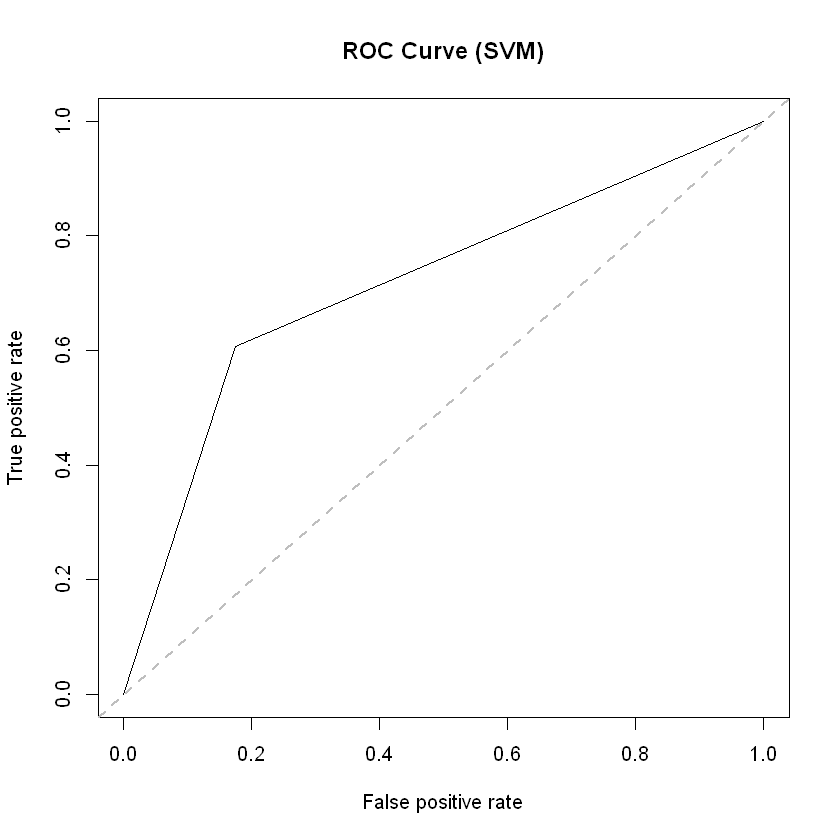

In [39]:
library(ROCR)
default_prediction_svm2 <-as.numeric(predict(model_svm_final,data_downsampled_test[,-24],type='prob'))
prediction_svm <- prediction(default_prediction_svm2, data_downsampled_test$DEFAULT)
performance_svm <- performance(prediction_svm, 'tpr','fpr')
plot(performance_svm, colorize = FALSE, text.adj = c(-0.2,1.7),main="ROC Curve (SVM)")
abline(a=0,b=1,lwd=2,lty=2,col="grey")

In [40]:
aucvalue_svm <- performance(prediction_svm, measure = "auc")
aucvalue_svm <- aucvalue_svm@y.values[[1]]
paste('AUC =',aucvalue_svm)
#AUC=0.716

[1] "AUC = 0.716"

### Random Forest

In [41]:
library(randomForest)
set.seed(1)
model_rf<-randomForest(DEFAULT~.,data=data_downsampled_train)
model_rf

#(1-29.66) % of the OOB(out of bag) error estimates were correctly classified by the random forest
#Number of decision trees generated=500(Default)
#Number of variables tried at each split=4

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin





Call:
 randomForest(formula = DEFAULT ~ ., data = data_downsampled_train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 29.66%
Confusion matrix:
     0    1 class.error
0 2627  873   0.2494286
1 1203 2297   0.3437143

In [42]:
set.seed(1)
default_prediction_rf <- predict(model_rf,data_downsampled_test[,1:23])
confusionMatrix(default_prediction_rf,data_downsampled_test$DEFAULT)
#70.3% accuracy on a validation set
#Using unseen data although random forest uses bootstrapping
#Sensitivity=0.8387

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1258  649
         1  242  851
                                          
               Accuracy : 0.703           
                 95% CI : (0.6863, 0.7193)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.406           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8387          
            Specificity : 0.5673          
         Pos Pred Value : 0.6597          
         Neg Pred Value : 0.7786          
             Prevalence : 0.5000          
         Detection Rate : 0.4193          
   Detection Prevalence : 0.6357          
      Balanced Accuracy : 0.7030          
                                          
       'Positive' Class : 0               
                        

In [43]:
set.seed(1)
oob_error<-data.frame(Trees=rep(1:nrow(model_rf$err.rate),times=3),
                    Type=rep(c("OOB",'Default','No Default'), each=nrow(model_rf$err.rate)),
                    Error=c(model_rf$err.rate[,'OOB'],
                           model_rf$err.rate[,'0'],
                           model_rf$err.rate[,"1"]))

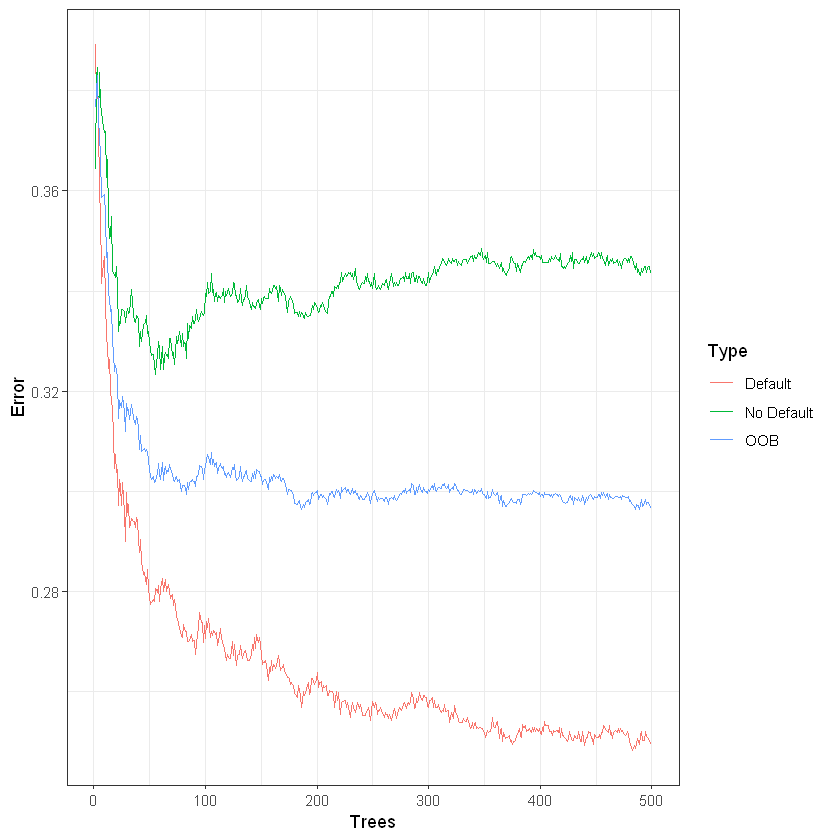

In [44]:
ggplot(data=oob_error,aes(x=Trees,y=Error))+geom_line(aes(color=Type))+theme_bw()
#Error rates decrease with increase in number of trees and stabalize after 500 trees

In [45]:
#Building random forest with more trees
model_rf2<-randomForest(DEFAULT~.,data=data_downsampled_train,ntree=1000)
model_rf2

#No significant increase
#OOB error rate of 29.87
#We can conclude that 500 trees are enough


Call:
 randomForest(formula = DEFAULT ~ ., data = data_downsampled_train,      ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 29.87%
Confusion matrix:
     0    1 class.error
0 2628  872   0.2491429
1 1219 2281   0.3482857

In [46]:
#oob_split<-vector(length=10)
#for(i in 1:10){model_rf_test<-randomForest(DEFAULT~.,data=data_downsampled_train,mtry=i,ntree=500)
#               oob_split[i]<-model_rf_test$err.rate[nrow(model_rf_test$err.rate),1]}
#oob_split

#Optimal number of variables for split is 1 when we use 500 trees

In [47]:
set.seed(1)
model_rf_final<-randomForest(DEFAULT~.,data=data_downsampled_train, mtry=1, ntree=500)
model_rf_final

#OOB error rate = 29.46


Call:
 randomForest(formula = DEFAULT ~ ., data = data_downsampled_train,      mtry = 1, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 29.46%
Confusion matrix:
     0    1 class.error
0 2659  841   0.2402857
1 1221 2279   0.3488571

In [48]:
set.seed(1)
default_prediction_rf <- predict(model_rf_final,data_downsampled_test[,1:23])
confusionMatrix(default_prediction_rf,data_downsampled_test$DEFAULT)
#Accuracy increased to 71.4
#Sensitivity=0.8253

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1238  596
         1  262  904
                                          
               Accuracy : 0.714           
                 95% CI : (0.6975, 0.7301)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.428           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8253          
            Specificity : 0.6027          
         Pos Pred Value : 0.6750          
         Neg Pred Value : 0.7753          
             Prevalence : 0.5000          
         Detection Rate : 0.4127          
   Detection Prevalence : 0.6113          
      Balanced Accuracy : 0.7140          
                                          
       'Positive' Class : 0               
                        

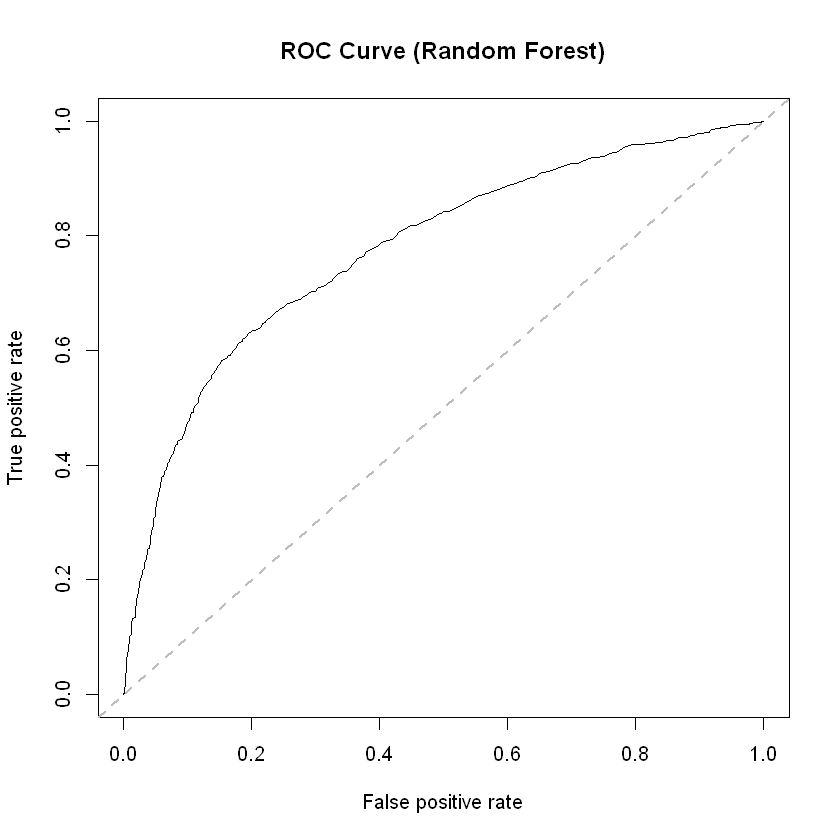

In [49]:
default_prediction_rf2 <- predict(model_rf_final,data_downsampled_test[,-24],type='vote') #type=vote number of random of forests who voted correctly
prediction_rf <- prediction(default_prediction_rf2[,2], data_downsampled_test$DEFAULT)
performance_rf <- performance(prediction_rf, 'tpr','fpr')
plot(performance_rf, colorize = FALSE, text.adj = c(-0.2,1.7),main="ROC Curve (Random Forest)")
abline(a=0,b=1,lwd=2,lty=2,col="grey")

In [50]:
aucvalue_rf <- performance(prediction_rf, measure = "auc")
aucvalue_rf <- aucvalue_rf@y.values[[1]]
paste('AUC =',aucvalue_rf)
#AUC=0.777

[1] "AUC = 0.777048444444444"

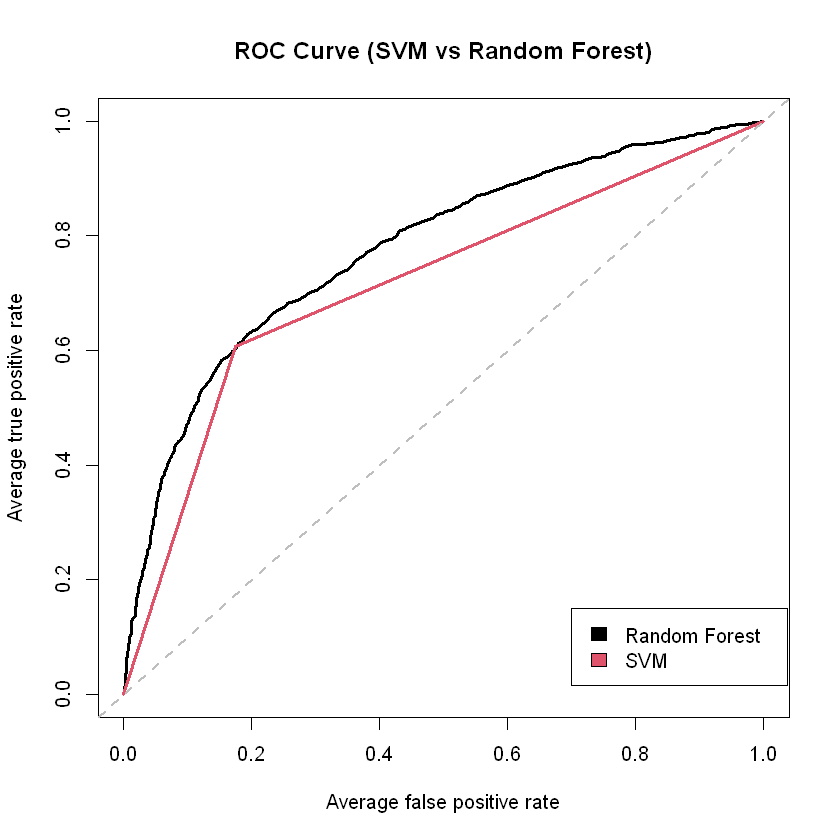

In [51]:
plot(performance_rf, col=1, lwd=3,avg= "threshold", main="ROC Curve (SVM vs Random Forest)")
plot(performance_svm, col=2, lwd=3, add=TRUE)
legend(0.7, 0.15, c("Random Forest","SVM"), 1:2)
abline(a=0,b=1,lwd=2,lty=2,col="grey")